In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
from anndata import AnnData, read_h5ad
from scipy.stats import pearsonr, norm, ttest_ind, fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns

import batchglm.api as glm
import diffxpy.api as de


/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, dpi_save=600)

scanpy==1.6.0 anndata==0.7.5 umap==0.3.10 numpy==1.17.4 scipy==1.5.0 pandas==1.1.4 scikit-learn==0.22.1 statsmodels==0.10.1 python-igraph==0.8.2 louvain==0.6.1


In [4]:
ORN_all = read_h5ad('/data/ORN_all_annotated_GH.h5ad')

In [5]:
ORN_adult = ORN_all[(ORN_all.obs.stage == 'adult') & (ORN_all.obs.all_types != 'NaN')]

In [6]:
#open DE genes from adult

hormoneR = []
with open('/data/Figure10/hormoneR_adult.txt') as f:
    for line in f:
           hormoneR.append(line.rstrip())

transmitter_r = []
with open('/data/Figure10/transmitter_r_adult.txt') as f:
    for line in f:
           transmitter_r.append(line.rstrip())
            
neuropeptides = []
with open('/data/Figure10/neuropeptide_adult.txt') as f:
    for line in f:
           neuropeptides.append(line.rstrip())

channels = []
with open('/data/Figure10/channels_adult.txt') as f:
    for line in f:
           channels.append(line.rstrip())

peptideR = []
with open('/data/Figure10/peptideR_adult.txt') as f:
    for line in f:
           peptideR.append(line.rstrip())            

        
len(hormoneR), len(transmitter_r), len(neuropeptides), len(channels), len(peptideR)


(4, 8, 1, 17, 10)

In [7]:
hormone_R = sorted(list(hormoneR) , key=str.casefold)
transmitter_R = sorted(list(transmitter_r) , key=str.casefold)
neuropeptide_R = sorted(list(peptideR) , key=str.casefold)
channels = sorted(list(channels) , key=str.casefold)
NPs = sorted(list(neuropeptides) , key=str.casefold)

In [8]:
ORN_adult.obs.all_types.cat.reorder_categories (['DA1','DC1','DL3','VA1d', 'VA1v','DM1',
       'DM2', 'DM4', 'V', 'VA2','D','DC2','DL5','VA6_DC3_DM3','VM3_VA5',
         'DL2d/v_DP1l_VC3l','VL1_VM1', 'DP1m_DC4','VP1l_VP3', 'VP4_VP1d_VP2',], inplace=True)

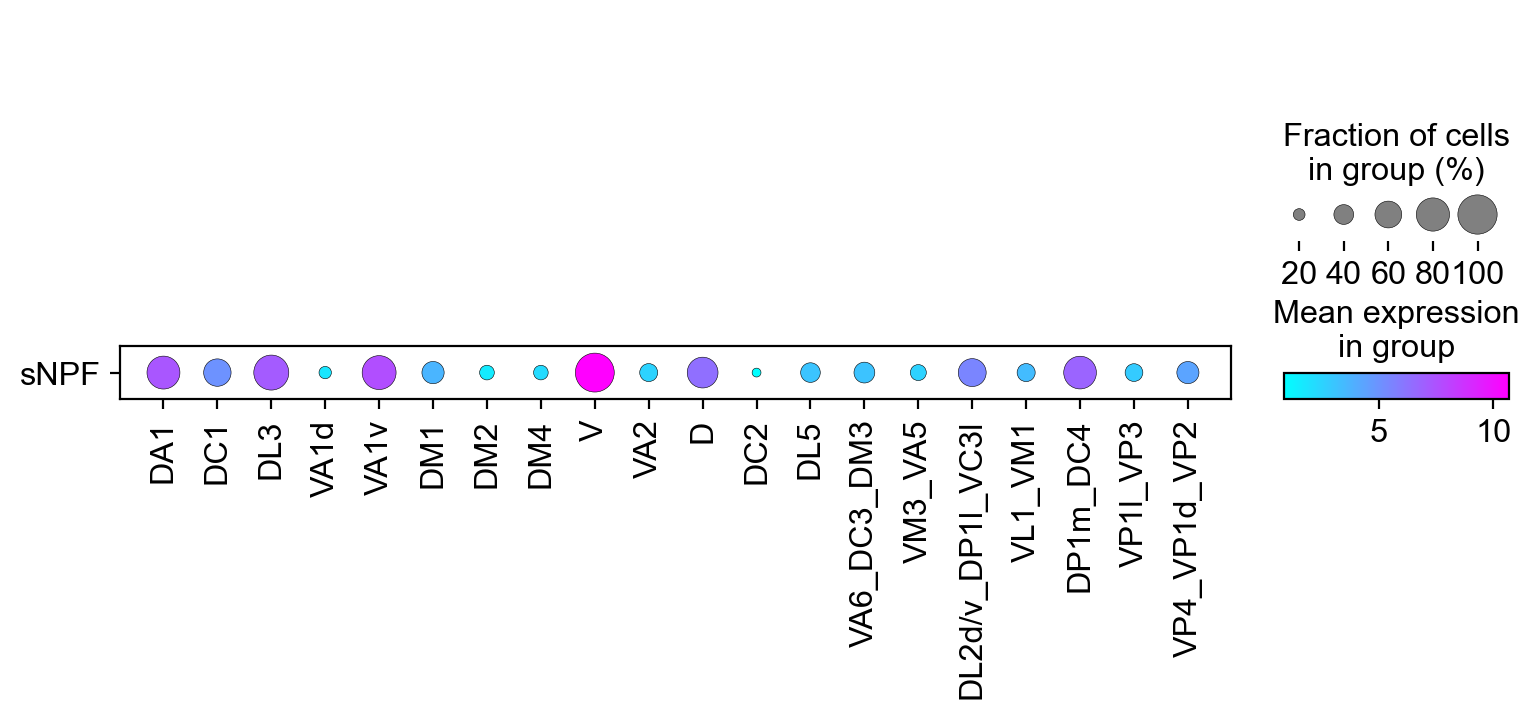

In [9]:
sc.pl.dotplot(ORN_adult, NPs, groupby='all_types', color_map='cool',dot_max = 1.0,
              swap_axes=True)

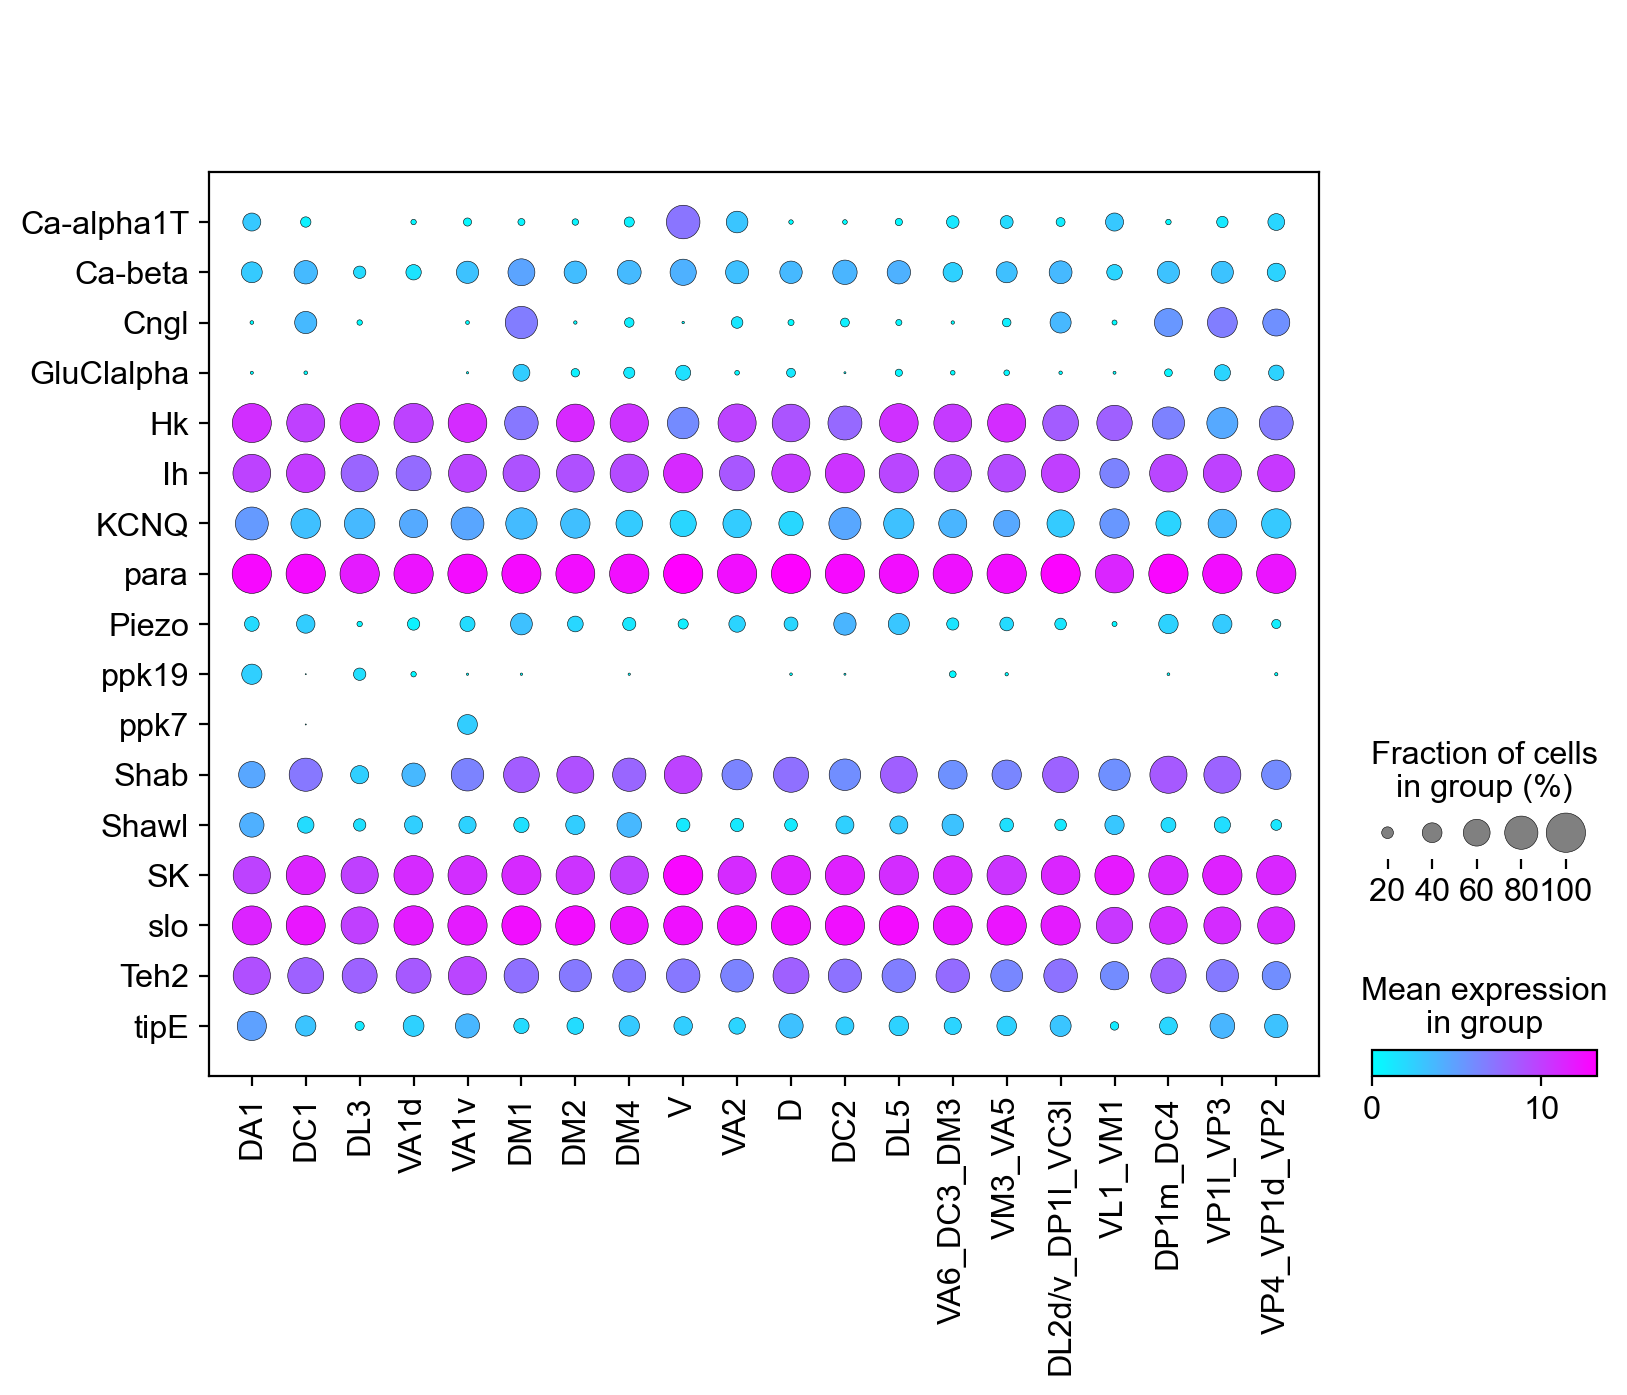

In [10]:
sc.pl.dotplot(ORN_adult, channels, groupby='all_types', color_map='cool', dot_max =1.0,
              swap_axes=True)

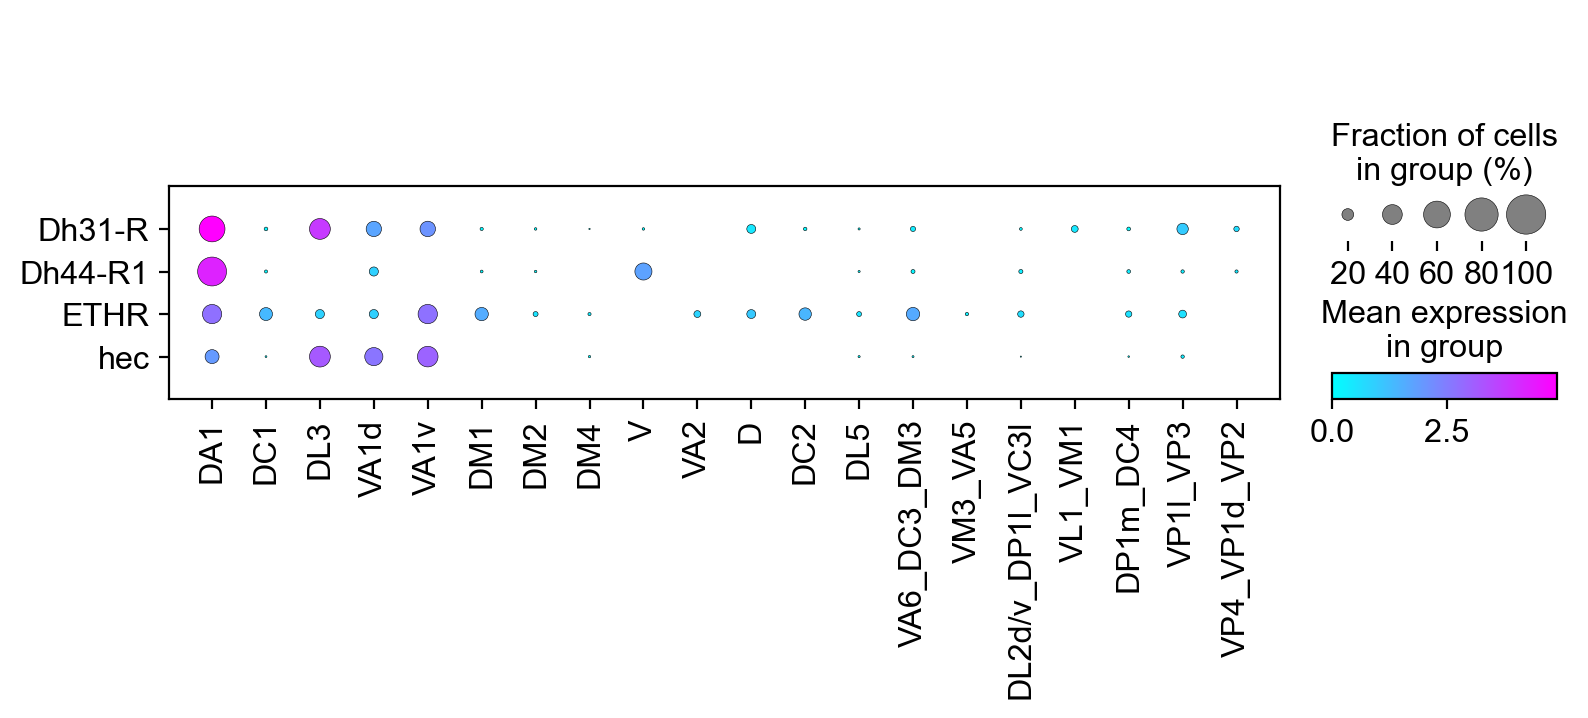

In [11]:
sc.pl.dotplot(ORN_adult, hormone_R, groupby='all_types', color_map='cool', dot_max = 1.0,
              swap_axes=True)

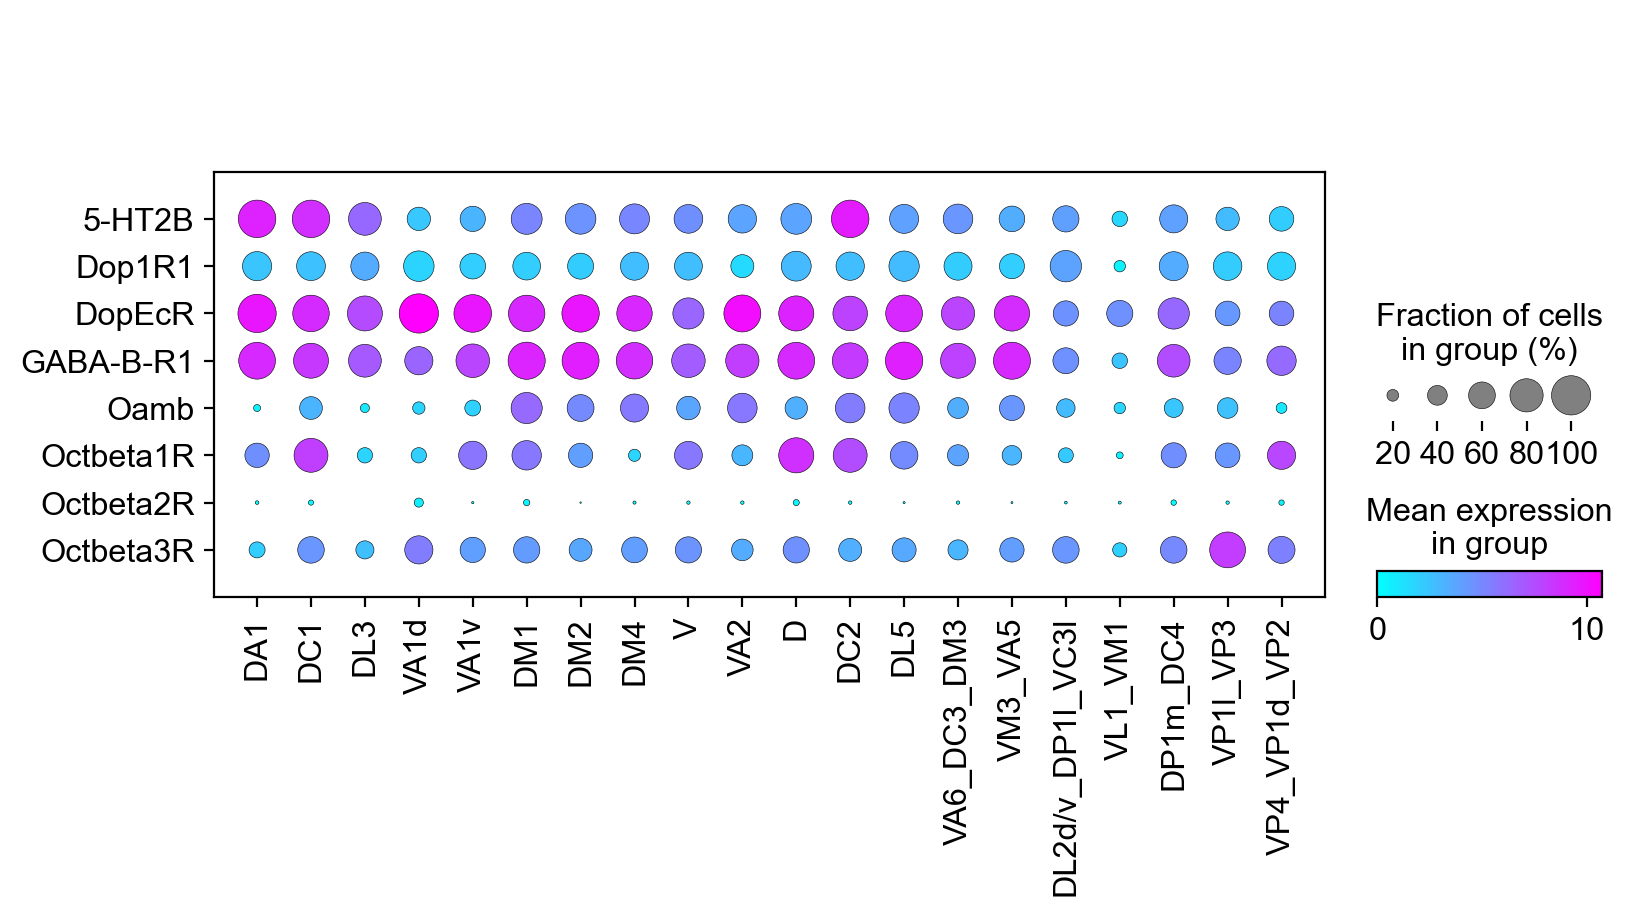

In [12]:
sc.pl.dotplot(ORN_adult, transmitter_R, groupby='all_types', color_map='cool',  
              swap_axes=True)

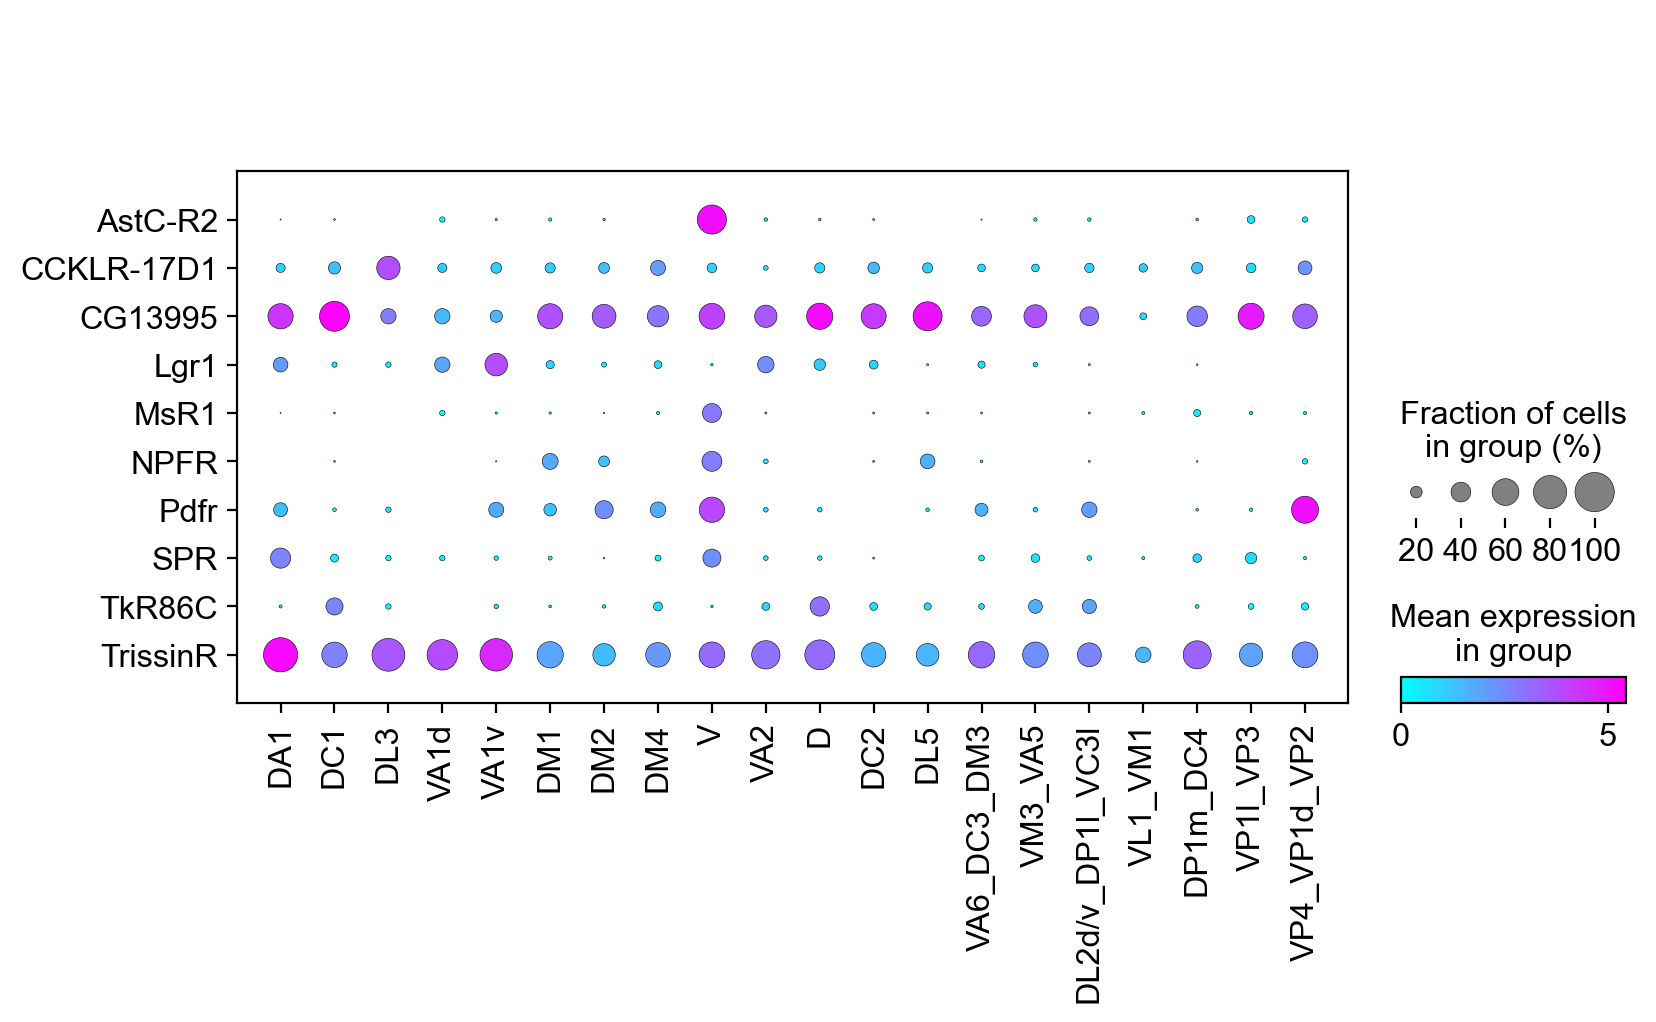

In [13]:
sc.pl.dotplot(ORN_adult, neuropeptide_R, groupby='all_types', color_map='cool', dot_max= 1.0,  
              swap_axes=True)